# Data Mining with Scikit-learn

## Agenda (Hand-on Data Mining)

#### 1. Hand-on Train 'Weather' data set

- Read csv file
- Decision Tree  
- SVM      

#### 2.  Workshop - Train 'Titanic' Data Set
- Decision Tree and Tuning Parameter

#### 3. Evaluation
- Confusion_Matrix
- Classification Report and Cross Validation

## 1. Hand-on 'Weather' data set 

### 1.1 Read csv file

In [1]:
import numpy as np
import pandas as pd

X = pd.read_csv('datasets/weather_preprocess.csv')
X[:5]

# outlook [1=sunny , 2=overcast, 3=rainy]
# widny [1=true, 2=false]
# play [0=no, 1=yes]

,outlook,temperature,humidity,windy,play
0,1,85,85,2,0
1,1,80,90,1,0
2,2,83,86,2,1
3,3,70,96,2,1
4,3,68,80,2,1


### Plot the weather data in scatter plot
##### x-axis is 'humidity'
##### y-axis is 'temperature'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

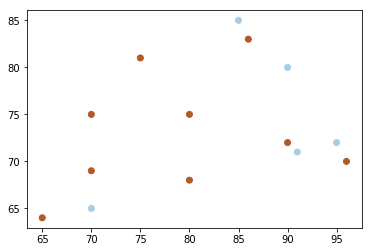

In [3]:
X_hum = np.array(X['humidity'])
X_temp = np.array(X['temperature'])
y_label = np.array(X['play'])
plt.scatter(X_hum, X_temp, c=y_label, cmap=plt.cm.Paired)

### 1.2 Train your data set with Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
X_train = X[['outlook','temperature','humidity','windy']]
y_train = X['play']
clf = clf.fit(X_train, y_train)

In [5]:
# outlook [1=sunny , 2=overcast, 3=rainy], windy [1=true, 2=false], play [0=no, 1=yes]
# Try : predict play or not if outlook=overcast, temp=71, humidity=91 and windy=false

In [6]:
clf.predict([ [2,71,91,2] ])

array([1])

In [7]:
feature_names = ['outlook','temperature','humidity','windy']
class_names = ['no','yes']

import os
from io import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,   
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

```sh
$ conda install -c conda-forge pydotplus=2.0.2
```

In [8]:
import pydotplus 
from IPython.display import Image

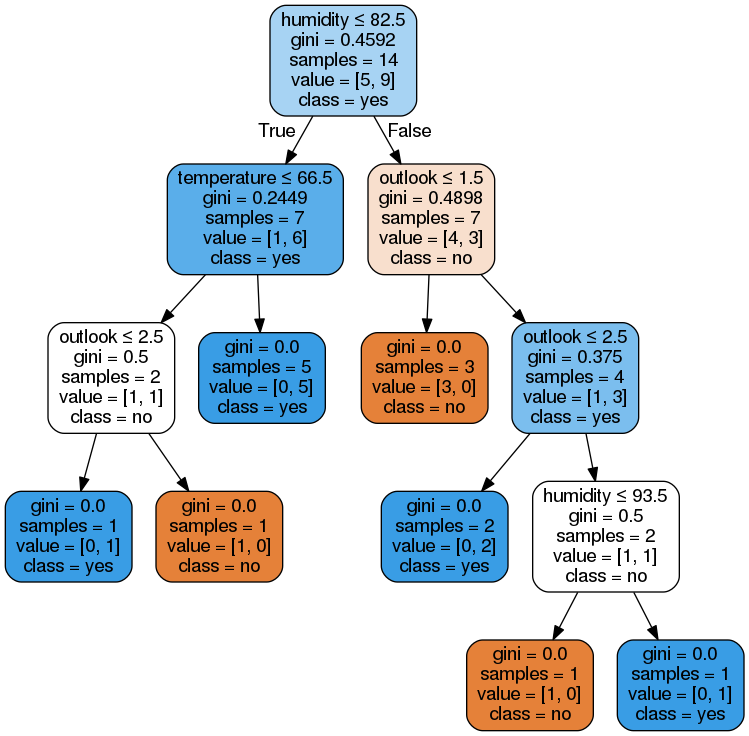

In [9]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), retina=True)

### 1.3 Train your data set with Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [11]:
nb_clf.predict([ [2,71,91,1] ])

array([0])

### 1.4 Train your data set with SVM

In [12]:
#X_train = X[['outlook','temperature','humidity','windy']]
#y_train = X['play']

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
svm_clf.predict([ [2,71,91,2] ])

array([1])

## 2. Train Titanic Data set

### 2.1 Decision Tree

##### Get titanic training data from your dataset folder ( by read csv file "titanic_train_preprocess.csv" )
- Survival: Survival (0 = no; 1 = yes)
- Pclass: Passenger class (1 = first; 2 = second; 3 = third)
- Sex: (0 = female, 1= male)
- SibSp: Number of siblings/spouses aboard
- ParCh: Number of parents/children aboard
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

##### <span style="color:red">Read your titanic_train_preprocess.csv to classify by decision tree</span>
- import file titanic_train_preprocess.csv
- show tinatic_train_preprocess first 10 rows

In [23]:
import numpy as np
import pandas as pd

X = pd.read_csv('datasets/titanic_train_preprocess.csv')
X.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


##### <span style="color:red"> Assign value to X_titinic and y_titanic </span>
- Select following attributes -> 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch' 
- Assign selected attributes to variable 'X_titanic'
- Assign 'Survived' attributes to variable 'y_titanic'

In [15]:
X_titanic = X[['Pclass','Sex','Age','Fare','SibSp','Parch']]
y_titanic = X['Survived']

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_titanic, y_titanic)

# Try to predict the result if:
# She is 25 years old who went there beside husband and son, 
# paid for the third class with a ticket $91.

In [17]:
clf.predict([ [3,0,25,91,1,1] ]) 

array([0])

In [18]:
feature_names = ['Pclass','Sex','Age','Fare','SibSp','Parch']
class_names = ['no survived','Survived']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

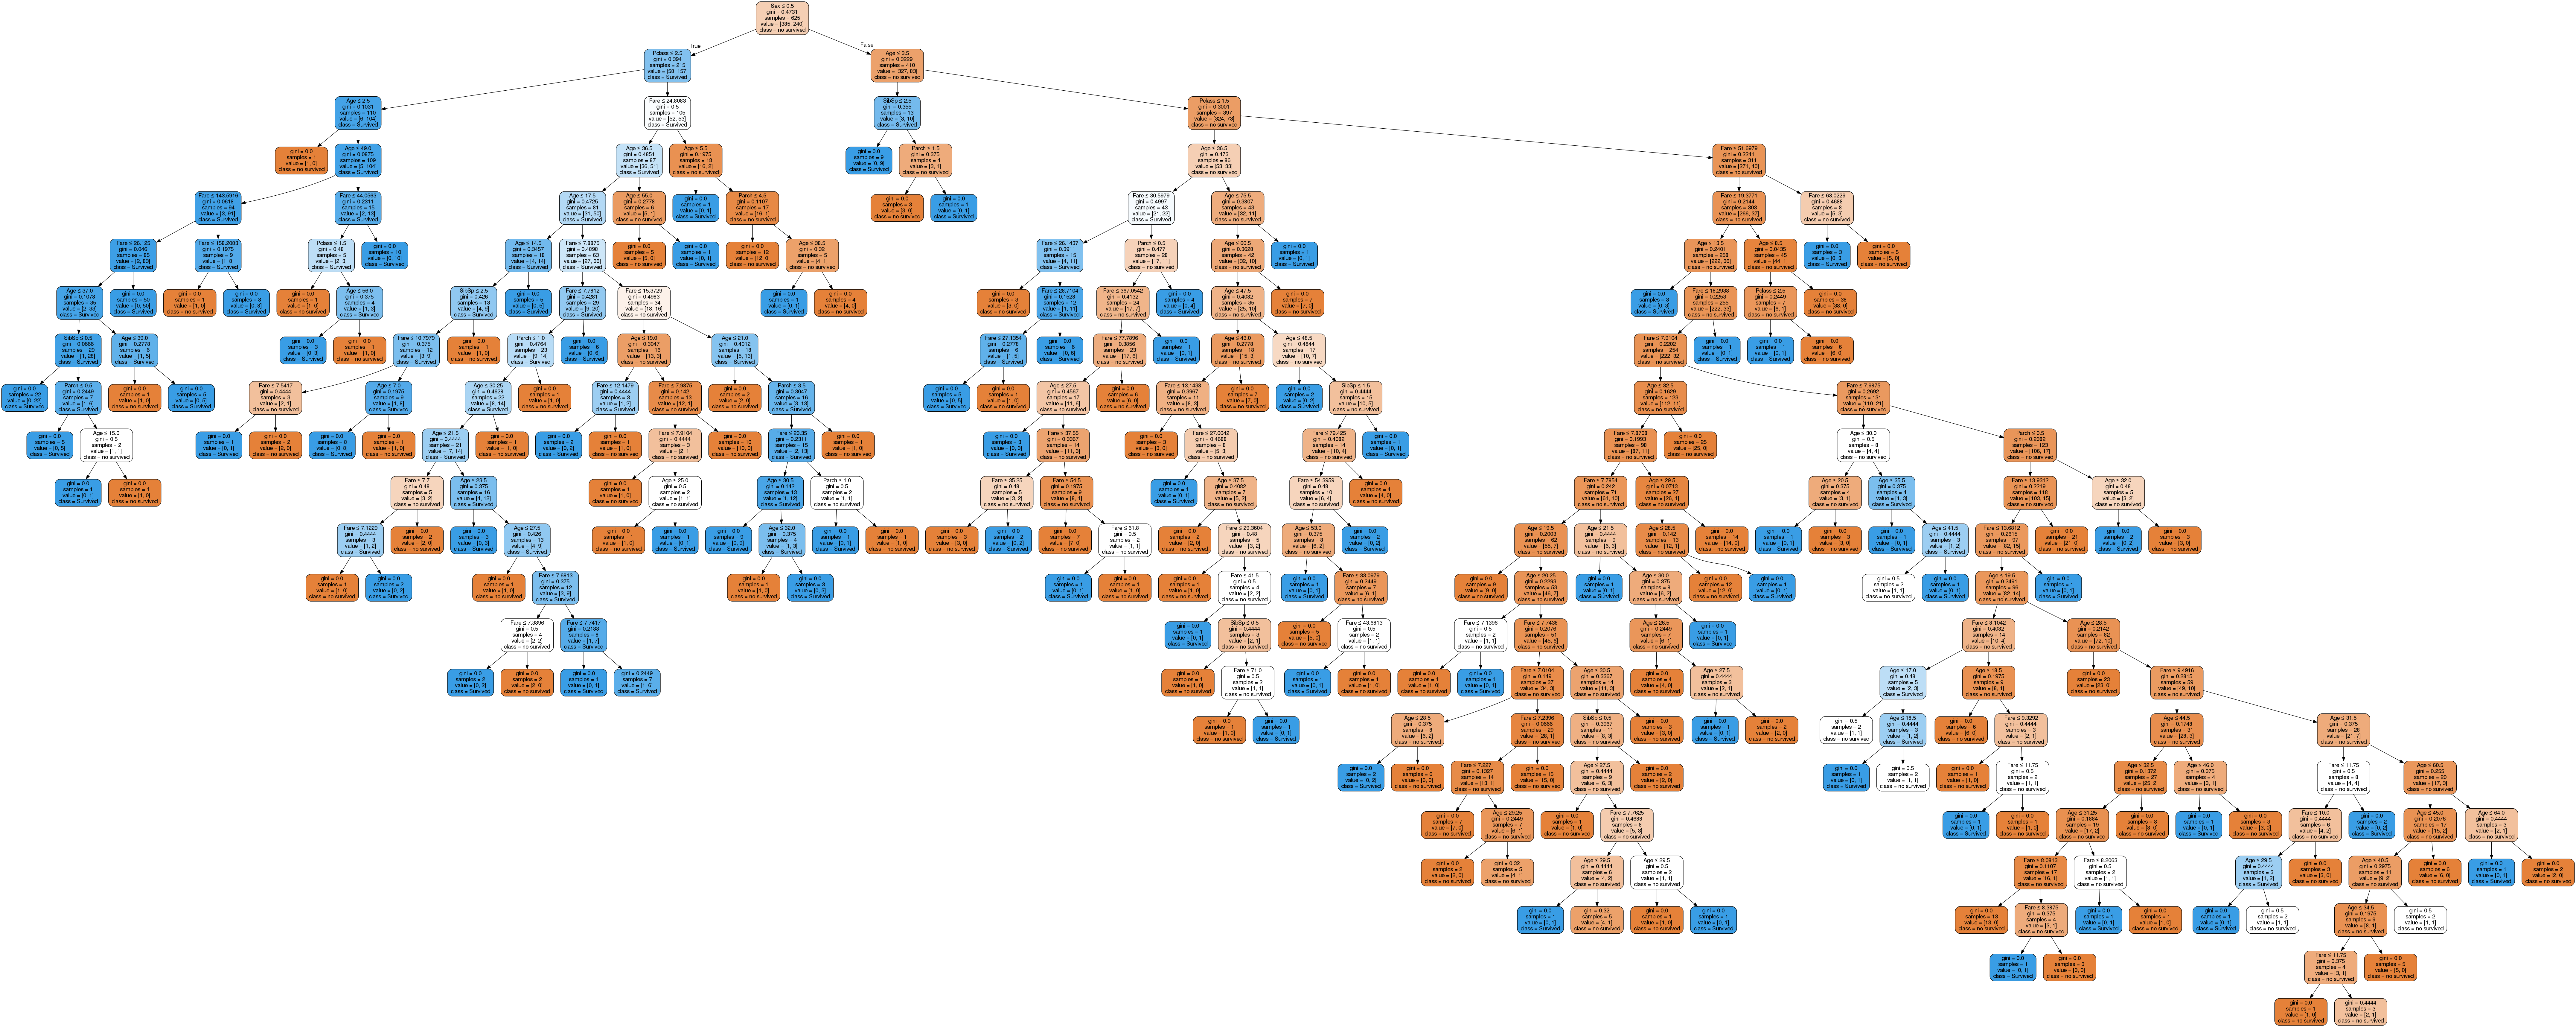

In [19]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), retina=True)

### 2.2 Parameter Tuning of Decision Tree

In [20]:
#clf = DecisionTreeClassifier()

clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3, min_samples_leaf=100)
clf = clf.fit(X_titanic, y_titanic) 

In [21]:
feature_names = ['Pclass','Sex','Age','Fare','SibSp','Parch']
class_names = ['no survived','Survived']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

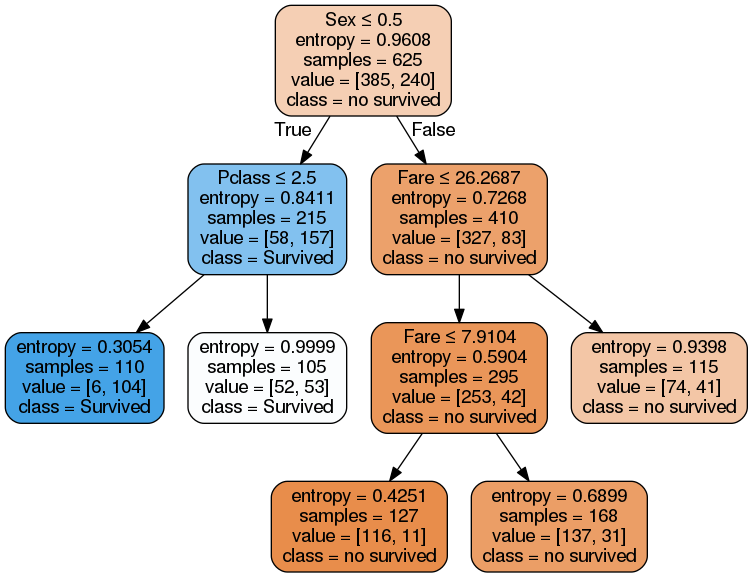

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), retina=True) #height='400px')

## 3. Evalution method

### 3.1 Confusion Matrix

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_thumb.png)

In [24]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 1, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 1, 1]])

<img  src='https://yanirs.github.io/talks/the-hardest-part-of-data-science/img/precision-recall.svg' style="height: 300px;">

In [26]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

### 3.2 Classification Report

In [27]:
from sklearn.metrics import classification_report

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [2, 0, 1, 2, 0, 1]
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00         2
    class 1       0.50      1.00      0.67         1
    class 2       1.00      0.67      0.80         3

avg / total       0.92      0.83      0.84         6



### 3.3 Classification Report with Titanic Data

In [44]:
# http://scikit-learn.org/stable/modules/cross_validation.html

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_titanic, y_titanic, test_size=0.10) #random_state=0

In [45]:
clf = SVC(kernel='linear') #C=1
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
# help(clf.score)

0.79365079365079361

In [48]:
target_names = ['Not survive', 'Survive']
print(classification_report(y_test, y_pred, target_names=target_names))
# avg / total = macro averaging

             precision    recall  f1-score   support

Not survive       0.86      0.84      0.85        43
    Survive       0.67      0.70      0.68        20

avg / total       0.80      0.79      0.79        63



In [ ]:
from sklearn.model_selection import cross_val_score

clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_titanic, y_titanic, cv=5)
scores

In [ ]:
from sklearn import metrics

scores = cross_val_score(clf, X_titanic, y_titanic, cv=5, scoring='f1_macro')
scores

#When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default